<div style="font-size: 50px;">
            A study of national suicide rates</br></br>
            </div>

In [53]:
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model, metrics, datasets, feature_selection
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
suicide = pd.read_csv('data/master.csv')

In [45]:
suicide.head()

,country,year,sex,age,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,796,Boomers


<div style = "font-size: 20pt; color: red">

extract valid columns

</div >

In [ ]:

included_col = ['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation']

In [7]:
suicide = suicide[included_col]

<div style = "font-size: 20pt; color: red">
    
pick out outliers. we assume suicide rates don't change drastically. we don't want to throw away too many data. arbitrarily narrow quantiles are implemented.
    
</div>

In [8]:
suicide['suicides/100k pop'].quantile([0, .005, .01, .02, .03, .04, .1, .12, .14, .15, .16, .18, .2])

0.000    0.00
0.005    0.00
0.010    0.00
0.020    0.00
0.030    0.00
0.040    0.00
0.100    0.00
0.120    0.00
0.140    0.00
0.150    0.00
0.160    0.13
0.180    0.29
0.200    0.41
Name: suicides/100k pop, dtype: float64

In [9]:
suicide['suicides/100k pop'].quantile([0.9, .91, .92, .93, .94, .95, .96, .97, .98, .99, 1])

0.90     33.2910
0.91     35.4158
0.92     38.1648
0.93     41.1934
0.94     44.9500
0.95     50.5305
0.96     57.0500
0.97     66.2658
0.98     77.7548
0.99     91.5710
1.00    224.9700
Name: suicides/100k pop, dtype: float64

<div style = "font-size: 20pt; color: red">
    
*suicide_cleaned* is the data set with outliers removed.
    
</div>

In [10]:
suicide_cleaned = suicide[(suicide['suicides/100k pop'] < 100)  & (suicide['suicides/100k pop'] > 0.1)]

In [11]:
suicide_cleaned['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

#total suicide rates during 1985 - 2016 of nations. We find the highest and lowest suicide 
rate. Canda's standing is compared with the highest and lowest.

<div style = "font-size: 20pt; color: red">
    
find suicide rate suicides number per 100k. available data of each nation are not all as complete,
    average of suicides number per 100k is taken. this means the age variance and year variance of suicide rate in a nation are zero. considering these data are only used to choose the nations of the highest and lowest suicide rate, this assumption is not a bad one.
    
</div>

In [129]:
country_suicide = suicide_cleaned[['country', 'suicides/100k pop']].groupby('country').agg(sum)
country_entries = suicide_cleaned[['country', 'suicides/100k pop']].groupby('country').agg(len)
country_entries.columns = ['entry number']
country_suicide_joined = pd.merge(country_suicide, country_entries, how='right', on = 'country')
country_suicide_joined['average suicide'] = country_suicide_joined['suicides/100k pop']/country_suicide_joined['entry number']
country_suicide_joined['order'] = range(len(country_suicide_joined))

In [44]:
country_suicide_joined.head(10)

,suicides/100k pop,entry number,average suicide,order
country,,,,
Albania,924.76,206.0,4.489126,0
Antigua and Barbuda,179.14,10.0,17.914000,1
Argentina,3894.59,372.0,10.469328,2
Armenia,976.21,252.0,3.873849,3
Aruba,1137.02,49.0,23.204490,4
Australia,4676.77,349.0,13.400487,5
Austria,7660.98,361.0,21.221551,6
Azerbaijan,356.24,165.0,2.159030,7
Bahamas,344.28,65.0,5.296615,8


<div style="font-size: 20px; color: red">
total suicide population per 100k of each country. a country is represented by its order number 
in the alphabatically ordered country list.
</div>

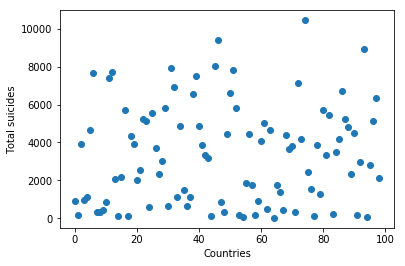

In [14]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['suicides/100k pop'])

plt.xlabel('Countries')
plt.ylabel('Total suicides')
plt.show()
           

<div style="font-size: 20px; color: red">
the data set doesn't have same complete entries of all nations. entry numbers are shown in the below plot. to make fair comparison, average of suicide population against entry number is taken. as shown in the next plot.
</div>

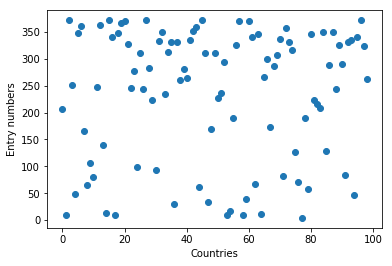

In [15]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['entry number'])
plt.xlabel('Countries')
plt.ylabel('Entry numbers')
plt.show()

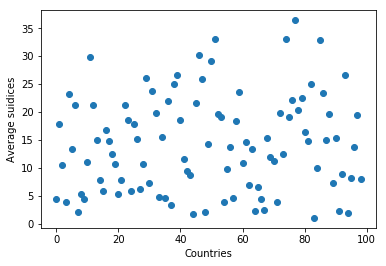

In [16]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['average suicide'])
plt.xlabel('Countries')
plt.ylabel('Average suidices')
plt.show()


<div style="font-size: 20px; color: red">
pick out the countries of highest suicide rate and lowest suicide rate.
</div>

In [17]:
country_suicide_joined[country_suicide_joined['average suicide'] == max(country_suicide_joined[country_suicide_joined['entry number'] > 200]['average suicide'])]


,suicides/100k pop,entry number,average suicide,order
country,,,,
Lithuania,7801.39,236.0,33.056737,51


In [18]:
x_canada, y_canada = country_suicide_joined.loc['Canada']['order'], country_suicide_joined.loc['Canada']['average suicide']
x_sa, y_sa = country_suicide_joined.loc['South Africa']['order'], country_suicide_joined.loc['South Africa']['average suicide']
x_sm, y_sm = country_suicide_joined.loc['San Marino']['order'], country_suicide_joined.loc['San Marino']['average suicide']
x_lith, y_lith = country_suicide_joined.loc['Lithuania']['order'], country_suicide_joined.loc['Lithuania']['average suicide']


In [19]:
country_suicide_joined.loc['South Africa']

suicides/100k pop    229.910000
entry number         209.000000
average suicide        1.100048
order                 83.000000
Name: South Africa, dtype: float64

<div style="font-size: 20px; color: red">
typical countries of sucide study. san marino's suicide rate is higher than lithuania, but consider
it's sparse entries in the data set, it's excluded from the study. lithuania is chosen as the 
nation of highest suicide rate.
</div>

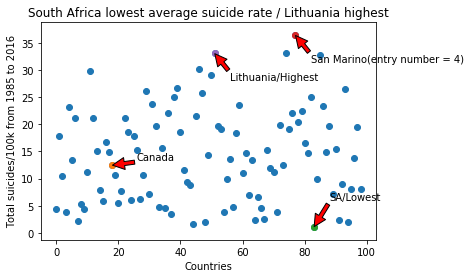

In [20]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['average suicide'])
plt.scatter(x_canada, y_canada)
plt.scatter(x_sa, y_sa)
plt.scatter(x_sm, y_sm)
plt.scatter(x_lith, y_lith)
plt.xlabel('Countries')
plt.ylabel('Total suicides/100k from 1985 to 2016')

plt.annotate('Canada', xy=(x_canada, y_canada), 
             xytext=(x_canada+8, y_canada+1),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('SA/Lowest', xy=(x_sa, y_sa), xytext=(x_sa+5, y_sa+5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('Lithuania/Highest', xy=(x_lith, y_lith), xytext=(x_lith+5, y_lith-5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('San Marino(entry number = 4)', xy=(x_sm, y_sm), xytext=(x_sm+5, y_sm-5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.title('South Africa lowest average suicide rate / Lithuania highest')
plt.show()

In [62]:
suicide_lith = suicide_cleaned[suicide_cleaned['country'] == 'Lithuania']
suicide_canada = suicide_cleaned[suicide_cleaned['country'] == 'Canada']
suicide_sa = suicide_cleaned[suicide_cleaned['country'] == 'South Africa']

In [63]:
canada_male = suicide_canada[suicide_canada['sex'] == 'male']
x_male = canada_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = canada_male.groupby('year').agg(sum)['suicides/100k pop']

In [64]:
regr = linear_model.LinearRegression()
regr.fit(x_male, y_male)
y_male_pred = regr.predict(x_male)

<div style="font-size: 20px; color: red">
suicide rate among males and females in canada. sometimes data visualization is cheating.
the blue line is a linear fit of variance of male suicide rate with years. it looks like there is
a good linear decrease in male suicide rate. the female suicide rate doesn't decrease with years,
but it looks almost constant. These are actually not true, as can be seen in the next plot. 
this is the result of scaling aberration. 
<div style="font-size: 30px; color: green">
can't trust plots without condition, sense of logic needs to be held all the time. 
</div>
actually this accidental linear relation doesn't present in the data of other nations
</div>

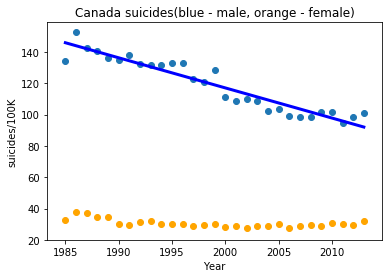

In [73]:
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.plot(x_male, y_male_pred, color='blue', linewidth=3)
plt.scatter(x_female, y_female, color="orange")
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Canada suicides(blue - male, orange - female)')
plt.show()


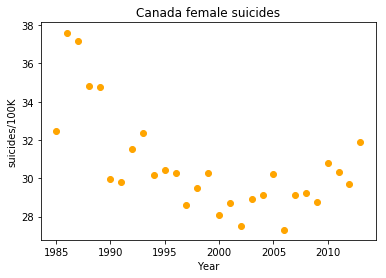

In [84]:
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides/100k pop']
#plt.scatter(x_male, y_male)
#plt.plot(x_male, y_male_pred, color='blue', linewidth=3)
plt.scatter(x_female, y_female, color="orange")
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Canada female suicides')
plt.show()


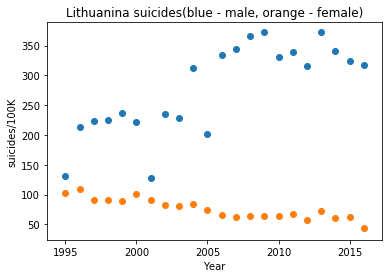

In [25]:
lith_male = suicide_lith[suicide_lith['sex'] == 'male']
x_male = lith_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = lith_male.groupby('year').agg(sum)['suicides/100k pop']
lith_female = suicide_lith[suicide_lith['sex'] == 'female']
x_female = lith_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = lith_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Lithuanina suicides(blue - male, orange - female)')
plt.show()

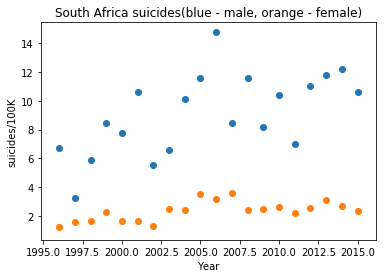

In [26]:
sa_male = suicide_sa[suicide_sa['sex'] == 'male']
x_male = sa_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = sa_male.groupby('year').agg(sum)['suicides/100k pop']
sa_female = suicide_sa[suicide_sa['sex'] == 'female']
x_female = sa_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = sa_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('South Africa suicides(blue - male, orange - female)')
plt.show()

<div style="font-size: 20px; color: red">
comparison of female suicide rates of the three countries. years of available data of canada are 
more than lithuania and south africa. we can see the comparision is drastic. lithuania female 
    suicide rate is almost 50 times higher than south africa. good news is lithuania female 
    suicide rate has a clearly decresing trend.
</div>

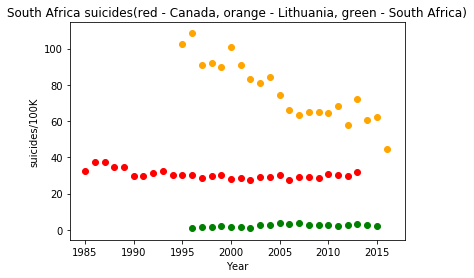

In [89]:
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_female, y_female, color="red")

lith_female = suicide_lith[suicide_lith['sex'] == 'female']
x_female = lith_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = lith_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_female, y_female, color="orange")

sa_female = suicide_sa[suicide_sa['sex'] == 'female']
x_female = sa_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = sa_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_female, y_female, color="green")

plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('South Africa suicides(red - Canada, orange - Lithuania, green - South Africa)')
plt.show()

<div style="font-size: 20px; color: red">
encode and get_dummies to convert categorical variables to quantitative variables. suicide 
is a complicated social behaviour. linear regression is used to build a quantitative model. 
hopefully it's enough to help find better policy measures to reduce suidice rates by governments.
</div>

In [27]:
suicide_dummies = pd.get_dummies(suicide_cleaned, columns=['age', 'sex', 'generation'])

In [91]:
from collections import defaultdict
dd = defaultdict(LabelEncoder)
encoded_suicide = suicide_cleaned[['country', 'year']].apply(lambda x: dd[x.name].fit_transform(x))
suicide_dummies[['country', 'year']] = encoded_suicide[['country', 'year']]


In [121]:
suicide_dummies.tail()

,country,year,population,suicides/100k pop,gdp_per_capita ($),age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,sex_female,sex_male,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
27815,98,29,3620833,2.96,2309,0,0,1,0,0,0,1,0,0,0,1,0,0,0
27816,98,29,348465,2.58,2309,0,0,0,0,0,1,1,0,0,0,0,0,0,1
27817,98,29,2762158,2.17,2309,0,0,0,1,0,0,0,1,0,0,0,1,0,0
27818,98,29,2631600,1.67,2309,0,0,0,1,0,0,1,0,0,0,0,1,0,0
27819,98,29,1438935,1.46,2309,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [93]:
factors = ['country',
 'year',
 'population',
 'gdp_per_capita ($)',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'sex_female',
 'sex_male',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent']

In [94]:
regr = linear_model.LinearRegression()
X = suicide_dummies[factors]
y = suicide_dummies['suicides/100k pop']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
regr.score(X_train, y_train)

0.3659806365465268

In [33]:
regr.score(X_test, y_test)

0.358865710340907

In [120]:
#pd.DataFrame(list(zip(factors, np.transpose(regr.coef_)))).sort_values(by=1)
para_significance = pd.DataFrame(list(zip(factors, np.transpose(regr.coef_))))
para_significance.iloc[(-para_significance[1].abs()).argsort()]

,0,1
7,age_5-14 years,-1.415947e+01
9,age_75+ years,1.271761e+01
11,sex_male,7.423344e+00
10,sex_female,-7.423344e+00
8,age_55-74 years,4.727595e+00
4,age_15-24 years,-4.428621e+00
6,age_35-54 years,2.136045e+00
15,generation_Generation Z,1.433712e+00
17,generation_Silent,-1.182780e+00
5,age_25-34 years,-9.931571e-01


<div style="font-size: 20px; color: red">
linear regression fit result, parameters ordered by the absolute value from large to small.</br></br>
the parameters can't be taken simply by their facevalues, since the quantitative variables in
the data are of different scales. for example, the small coefficients of gdp_per_capita and population are further supressed by their large quantitative values in the data set, but even considered that, they are still insignificant factors. </br>
that's not true for "country", although it's coefficient is small, we have seen from the above
comparison that country is a significant factor. there are around 100 countries in the data set,
its big value suppresses its coefficient. </br></br>
a better fit would be bring all the quantified variables to similar orders of magnitude. that 
will give better evaluation of their significance from their fit coefficients.</br></br>
it can be read from the fit result that age and gender play significant roles in suicide rate. 
very older age groups are inclined to suicide and younger groups are not. males are inclined and 
females are not. Another conclusion is surprising, richness of the population (gdp_per_capita) 
doesn't play a significant role. 
</div>

In [124]:
y_predict = regr.predict(X)
suicide_com = suicide_cleaned.join(pd.DataFrame(y_predict))
suicide_com.columns = [           'country',               'year',                'sex',
                      'age',         'population',  'suicides/100k pop',
       'gdp_per_capita ($)',         'generation',                    'suicides predicted']

In [125]:
suicide_com = suicide_com[['country', 'year', 'sex','age', 'population','gdp_per_capita ($)',
                           'generation', 'suicides/100k pop','suicides predicted']]

In [127]:
suicide_com.head(10)

,country,year,sex,age,population,gdp_per_capita ($),generation,suicides/100k pop,suicides predicted
0,Albania,1987,male,15-24 years,312900,796,Generation X,6.71,17.480500
1,Albania,1987,male,35-54 years,308000,796,Silent,5.19,22.636942
2,Albania,1987,female,15-24 years,289700,796,Generation X,4.83,2.633114
3,Albania,1987,male,75+ years,21800,796,G.I. Generation,4.59,34.166232
4,Albania,1987,male,25-34 years,274300,796,Boomers,3.28,20.098413
5,Albania,1987,female,75+ years,35600,796,G.I. Generation,2.81,19.319959
6,Albania,1987,female,35-54 years,278800,796,Silent,2.15,7.789376
7,Albania,1987,female,25-34 years,257200,796,Boomers,1.56,5.251211
8,Albania,1987,male,55-74 years,137500,796,G.I. Generation,0.73,26.179698
12,Albania,1988,female,75+ years,36400,769,G.I. Generation,5.49,22.522425


<div style="font-size: 20px; color: red">
the last two columns show the suicide rate in the data set and the predicted suicide rate from 
    the model. they don't fit well, actually some predicted values are even negative. </br></br>
    obviously, the simple linear model is not precise at all. most of time, a naive model doesn't 
    produce good results. expertise knowlege and trial and error help build better working models.
    </br></br>
    in this case of suicide study, country, gender, age groups are the most significant factors. 
    a realistic model may need to categorize these variables and build distinguished models in
    each category. 
</div>

In [128]:
#suicide_com[suicide_cleaned['country'] == 'Canada'].loc[4921: 4925]

In [43]:

#suicide_com[suicide_cleaned['country'] == 'United States'].head()